In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

: 

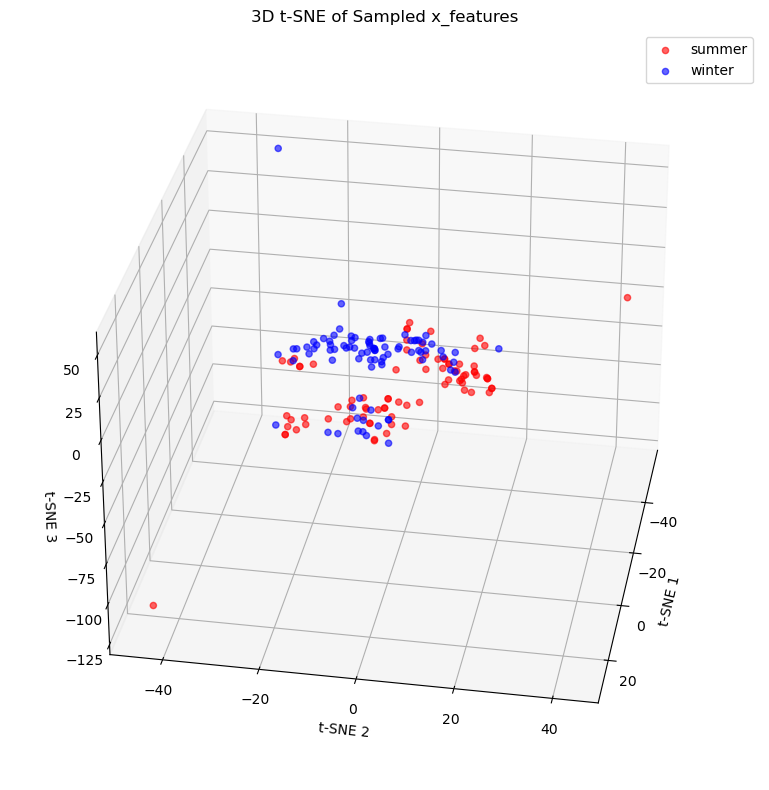

In [ ]:
df = pd.read_csv(r"\outputs\finetune\faod+caod_2001-2024_test_beijing_pred.csv")

x_feature_cols = [col for col in df.columns if col.startswith("x_feature_")]
X = df[x_feature_cols]

# 根据月份判断季节
months = df["Month"]
season_labels = months.apply(lambda m: "summer" if m in [5, 6, 7] else ("winter" if m in [11, 0, 1] else "other"))

# 只保留夏季和冬季样本
mask = season_labels.isin(["summer", "winter"])
X_season = X[mask]
labels = season_labels[mask]

# 随机采样最多各100个样本
summer_samples = X_season[labels == "summer"].sample(n=min(85, sum(labels == "summer")), random_state=42)
winter_samples = X_season[labels == "winter"].sample(n=min(85, sum(labels == "winter")), random_state=42)

X_sampled = pd.concat([summer_samples, winter_samples])
sampled_labels = ["summer"] * len(summer_samples) + ["winter"] * len(winter_samples)

# 使用t-SNE降维
tsne = TSNE(n_components=3, random_state=88, perplexity=10, n_iter=500, init='pca', learning_rate='auto')
X_tsne_3d = tsne.fit_transform(X_sampled)

# 绘图
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
for season, color in zip(["summer", "winter"], ["red", "blue"]):
    idx = [s == season for s in sampled_labels]
    ax.scatter(X_tsne_3d[idx, 0], X_tsne_3d[idx, 1], X_tsne_3d[idx, 2], c=color, label=season, alpha=0.6)

ax.view_init(elev=30, azim=10)
ax.set_title("3D t-SNE of Sampled x_features")
ax.set_xlabel("t-SNE 1")
ax.set_ylabel("t-SNE 2")
ax.set_zlabel("t-SNE 3")
ax.legend()
plt.tight_layout()
plt.show()
